### Background Knowledge
**Diabetes is a chronic Medical condition that affects the body's ability to use/produce insulin; Insulin is a hormone that regulates blood sugar levels.<br>
This medical condition can occur in two types; Type 1 and Type 2.<br>**
1. **The Type 1: makes the body's immune system to attack the cells in the pancreas that produces the insulin.<br>
Once the body is unable to produce Insulin, the blood sugar level gets high.
The type 1 can occur at any age but it is occurs mostly in childhood or adolescence.**
2. **The Type 2: makes the body resistant to insulin or doesn't produce enough of it.
The type 2 is more common in adults but can occur at any age too.**
<br>
**The symptoms of diabetes include Increased Thirst and hunger, fatigueness, blurred vision, slow healing of wounds etc.**<br>
**The effects if not treated may include high blood sugars damaging blood vessels and nerves leading to range of complications, including heart and kidney disease, nerve damage and even blindness**<br>
**Management of this condition involves change in lifestyle such as healthy diet, regular exercise, weight loss, medications and insulin therapy in some cases.**<br>
**It is important for people with diabetes to monitor their blood sugar levels regularly and work closely with their healthcare team to manage the condition and prevent further complications**<br><br>
**Diabetes is a significant health issue in Nigeria and the prevalence of the disease keeps increasing in the country; According to International Diabetes Federation(IDF), in 2019, Nigeria had an estimated 5.2M adults livng with Diabetes.**

<p style="color:blue"><b>In this project, I created a Model that predicts if someone is living with Diabetes or not using some Medical conditions/Informations like Number of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction</b></p>
1. Number of Pregnancies<br>
2. Glucose: this is the amount of sugar that serves as the primary source of energy for the cells in the human body. This is measured in mg/dL<br>
3. BloodPressure: This is the force of the blood against the walls of the arteries as it circulates through the body. Blood pressure is measured in mmHg.<br>
4. SkinThickness: this is the depth or thickness of the various layers of skin.<br>
5. Insulin: an hormone that is produced by the pancreas. Its function is to regulate the amount of sugar in the bloodstream by signalizing the body's cells to take up glucose from the blood and it for energy or store it for later use.<br>
6. BMI: Body Mass Index<br>
7. DiabetesPedigreeFunction: this is a mathematical formula that estimates the likelihood of a person developing type 2 diabetes based on Family history of the disease.

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
# Load Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [3]:
## Shape of Dataset
print("Number of Columns = ", df.shape[0])
print("Number of Rows = ", df.shape[1])
df.shape

Number of Columns =  768
Number of Rows =  9


(768, 9)

In [4]:
## Null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
## Non-null info, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Duplicated rows
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


We have a clean Dataset

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
## Number of people with and without Diabetes in the Dataset
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

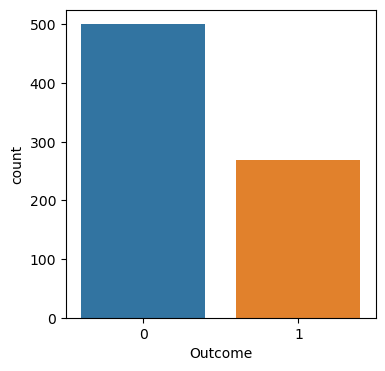

In [9]:
# Distribution of  Outcomes

pt.figure(figsize = (4,4))
sns.countplot(x = df["Outcome"])
pt.show()

1 means Diabetic and 0 means non-diabetic.<br>
We have an uneven data as the ratio of People with Diabetes to people without Diabetes is roughly 1:2

### Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
def scale(dataset):
    for feature in features:
        dataset[feature] = ss.fit_transform(dataset[[feature]])
scale(df)

In [13]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.90727,-0.692891,0.204013,0.468492,1.425995,1


### Modelling

In [14]:
## Split Feature from Target
X = df.drop("Outcome", axis = 1)
y = df.Outcome

#### Get train and test...

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = .3, random_state = 3)

### Supported vector Classifier

In [16]:
model = SVC()

In [17]:
model.fit(X_train, y_train)

SVC()

***Model Evaluation***

In [18]:
## Accuracy Score on train Dataset
model.score(X_train, y_train)

0.8342644320297952

In [19]:
## Accuracy Score on Test Dataset
model.score(X_test, y_test)

0.7445887445887446

In [20]:
### Checking distribution of "Outcome in Train" dataset
unique, counts =np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 367, 1: 170}

**The classes are unevenly distributed, hence the Accuracy_score cannot be fully relied on; other evaluation/Performance metrics should do...**

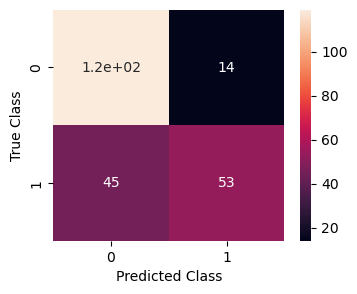

In [21]:
pred = model.predict(X_test)
pt.figure(figsize = (4,3))
sns.heatmap(metrics.confusion_matrix(y_test, pred), annot=True, square = True)
pt.xlabel("Predicted Class")
pt.ylabel("True Class")
pt.show()

In [22]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       133
           1       0.79      0.54      0.64        98

    accuracy                           0.74       231
   macro avg       0.76      0.72      0.72       231
weighted avg       0.75      0.74      0.73       231



1. 120; people that are non-diabetic and the Model has predicted it right - True Positive
2. 14; people that are not diabetic but the model says they are; wrong prediction - False Negative
3. 45, people that are Diabetic but the model says they aren't; this is critical as it can cause bad things in the patients - False Positive

4. 53, means 53 Patients are not diabetic and the model has predicted it that they aren't. - True Negative

### RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators = 100)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
## Accuracy on Train
rfc.score(X_train, y_train)

1.0

In [27]:
# Accuracy on Test

rfc.score(X_test, y_test)

0.7445887445887446

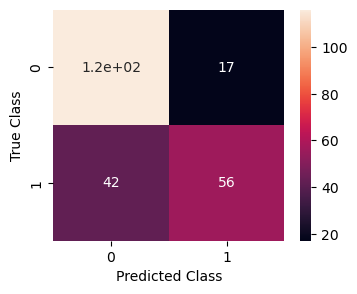

In [28]:
pred = rfc.predict(X_test)
pt.figure(figsize = (4,3))
sns.heatmap(metrics.confusion_matrix(y_test, pred), annot=True, square = True)
pt.xlabel("Predicted Class")
pt.ylabel("True Class")
pt.show()

In [29]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       133
           1       0.77      0.57      0.65        98

    accuracy                           0.74       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.74      0.74       231



### Model Tuning on SVC - GridSearchCv

In [30]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'signoid'],
    'C': [1, 5, 10, 20]
}

In [31]:
classifier = GridSearchCV(SVC(), parameters, cv = 5)

In [32]:
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx",

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'signoid']})

In [33]:
classifier.best_params_

{'C': 1, 'kernel': 'linear'}

In [34]:
classifier.best_score_

0.7894427137417791

In [35]:
classifier.score(X_train, y_train)

0.7932960893854749

In [36]:
classifier.score(X_test, y_test)

0.7359307359307359

In [37]:
pred = classifier.predict(X_test)

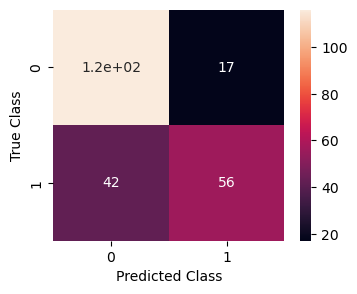

In [38]:
pred = rfc.predict(X_test)
pt.figure(figsize = (4,3))
sns.heatmap(metrics.confusion_matrix(y_test, pred), annot=True, square = True)
pt.xlabel("Predicted Class")
pt.ylabel("True Class")
pt.show()

In [39]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       133
           1       0.77      0.57      0.65        98

    accuracy                           0.74       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.74      0.74       231

